In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
cons = pd.read_csv('complaints_dec_2014.csv')


In [4]:
date_series = cons.pop('Date received')


In [5]:
pd.to_datetime(date_series, format='%m/%d/%Y')


0       2014-12-31
1       2014-12-31
2       2014-12-31
3       2014-12-31
4       2014-12-31
5       2014-12-31
6       2014-12-31
7       2014-12-31
8       2014-12-31
9       2014-12-31
10      2014-12-31
11      2014-12-31
12      2014-12-31
13      2014-12-31
14      2014-12-31
15      2014-12-31
16      2014-12-31
17      2014-12-31
18      2014-12-31
19      2014-12-31
20      2014-12-31
21      2014-12-31
22      2014-12-31
23      2014-12-31
24      2014-12-31
25      2014-12-31
26      2014-12-31
27      2014-12-31
28      2014-12-31
29      2014-12-31
           ...    
11513   2014-12-01
11514   2014-12-01
11515   2014-12-01
11516   2014-12-01
11517   2014-12-01
11518   2014-12-01
11519   2014-12-01
11520   2014-12-01
11521   2014-12-01
11522   2014-12-01
11523   2014-12-01
11524   2014-12-01
11525   2014-12-01
11526   2014-12-01
11527   2014-12-01
11528   2014-12-01
11529   2014-12-01
11530   2014-12-01
11531   2014-12-01
11532   2014-12-01
11533   2014-12-01
11534   2014

In [6]:
cons.index = pd.to_datetime(date_series, format='%m/%d/%Y')


In [7]:
cons

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
2014-12-31,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
2014-12-31,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,01/07/2015,Amex,Closed with explanation,Yes,NaN
2014-12-31,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
2014-12-31,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN


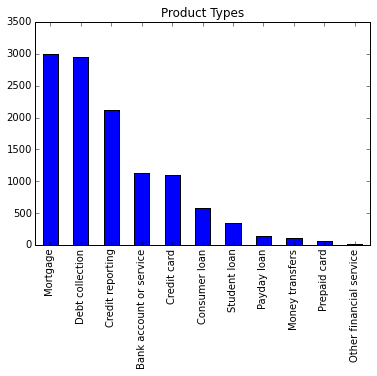

In [8]:
cons.Product.value_counts().plot(title = "Product Types", kind = 'bar')
plt.show()

It appears as though the most common types of consumer complaints involved mortgages, debt collectors, and credit reporting. 

In [9]:
cons.Company.value_counts()[:10]

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

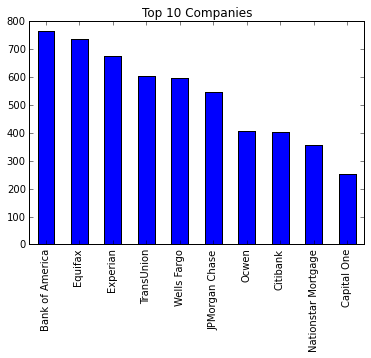

In [10]:
cons.Company.value_counts()[:10].plot(title = "Top 10 Companies", kind = 'bar')
plt.show()

Unsurprisingly, given the data from the first graph, the most commonly complained about companies were either credit bureaus (Equifax, Experian, etc) or mortgage lenders such as Bank of America, Wells Fargo and JP Morgan Chase.

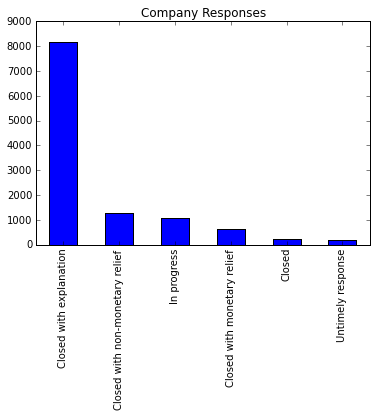

In [11]:
cons['Company response'].value_counts().plot(title = "Company Responses", kind = 'bar')
plt.show()

The vast majority of complaints were closed with an explanation. A few were closed with monetary or non-monetary relief, but overall it seemed as though an explanation and an apology sufficed. 

In [12]:
cons.index = cons.index.weekday

In [13]:
vals = [x for x in cons.index.value_counts()]

In [14]:
x_vals = [round(x/4.43, 2) for x in vals]

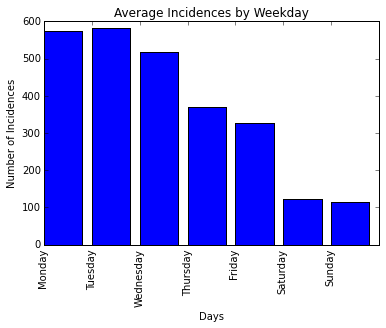

In [18]:
plt.bar([1,0,2,3,4,5,6], x_vals)
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title("Average Incidences by Weekday")
plt.ylabel("Number of Incidences")
plt.xlabel("Days")
plt.show()

The most occurences occur in the beginning of the week. With the data sloping sharply as the week wears on. 